In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
VI = pd.read_csv("VI.csv")
TV = pd.read_csv("TV.csv")
VF = pd.read_csv("VF.csv")

In [4]:
VI["lnI"] = np.log(VI["Current"])
VI

,Current,Voltage,lnI
0,0.1,0.605,-2.302585
1,0.2,0.634,-1.609438
2,0.3,0.651,-1.203973
3,0.4,0.662,-0.916291
4,0.5,0.670,-0.693147
5,0.7,0.683,-0.356675
6,1.0,0.697,0.000000
7,1.5,0.711,0.405465
8,2.0,0.721,0.693147
9,3.0,0.736,1.098612


## V Vs lnI

In [6]:
plt.rcdefaults()

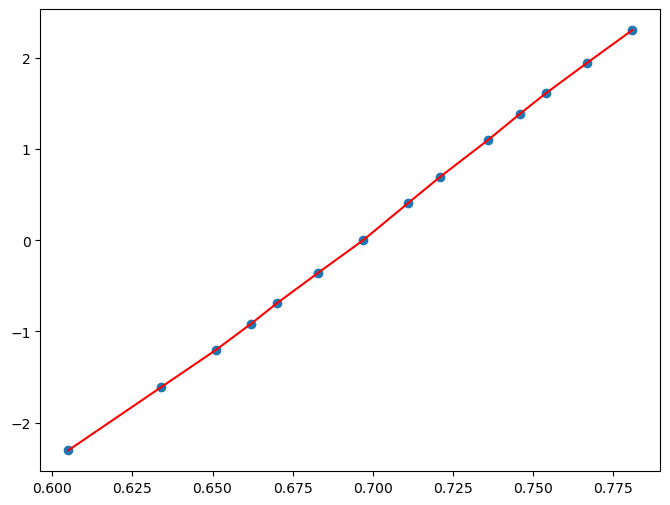

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(VI["Voltage"], VI["lnI"])
plt.plot(VI["Voltage"], VI["lnI"],"r")

In [14]:
def linear_regression(X, Y, plot = True, statistics = True):
    """
    Linear regression using the least squares method.

    Parameters
    ----------
    X : array_like
        Independent variable.
    Y : array_like
        Dependent variable.
    plot : bool, optional
        If True, plot the regression line. Default is True.
    statistics : bool, optional
        If True, return the statistics. Default is True.

    Returns
    -------
    beta : array_like
        Coefficients of the linear regression model.
    stats : dict
        Statistics of the linear regression model.
        `r` : correlation coefficient
        `sy` : Standard Deviation of data
        `syx` : standard error of the estimate
    """
    xmean = np.mean(X)
    ymean = np.mean(Y)
    variane = np.sum((X-xmean)**2)
    beta1 = np.sum((X-xmean)*(Y-ymean))/variane
    beta0 = ymean - beta1*xmean
    beta = np.array([beta0, beta1])

    if plot:
        X_l = np.linspace(np.mean(X)-3*np.std(X), np.mean(X)+3*np.std(X), 100)
        Y_l = beta0 + beta1*X_l
        plt.figure(figsize=(8,6))
        plt.scatter(X,Y)
        plt.plot(X_l,Y_l, "r")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()
    
    if statistics:
        n = len(X)
        SY = np.sqrt((np.sum((Y-ymean)**2))/(n-1))
        SYX = np.sqrt(((Y-beta0-beta1*X)**2).sum()/(n-2))

        term1 = np.sum(X*Y)
        term2 = np.sum(X)*np.sum(Y)
        numerator = n*term1 - term2
        term3 =  n*np.sum(X**2) - (np.sum(X))**2
        term4 = n*np.sum(Y**2) - (np.sum(Y))**2
        denominator = np.sqrt((term3*term4))
        r = numerator/denominator
        stats = {"r": r, "SY": SY, "SYX": SYX}
        return beta, stats
    else:
        return beta

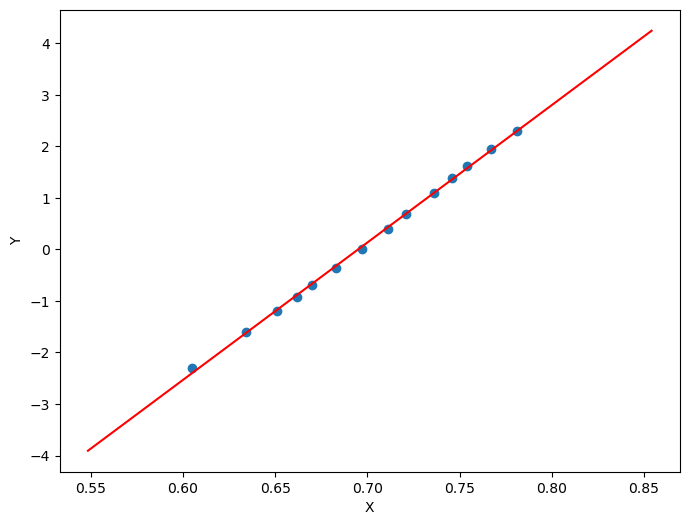

In [15]:
beta = linear_regression(VI["Voltage"], VI["lnI"])

In [16]:
beta

(array([-18.5256339 ,  26.65697881]),
 {'r': 0.9996101319444245,
  'SY': 1.4099580273779302,
  'SYX': 0.04097497789456939})

## V vs Temperature

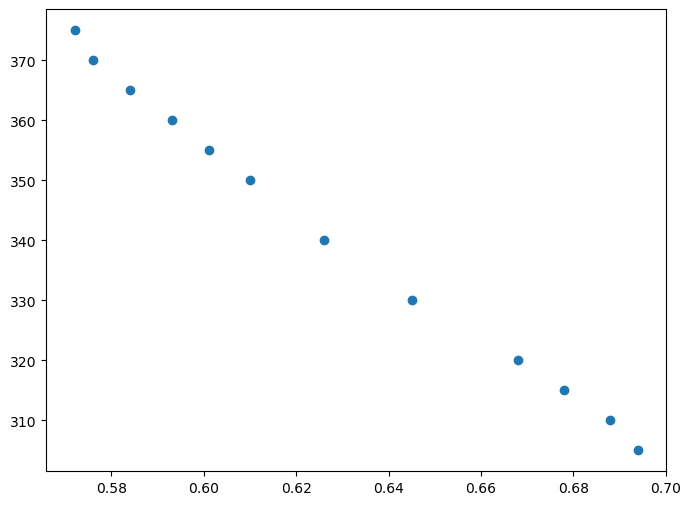

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(TV["Voltage"], TV["Temperature"])

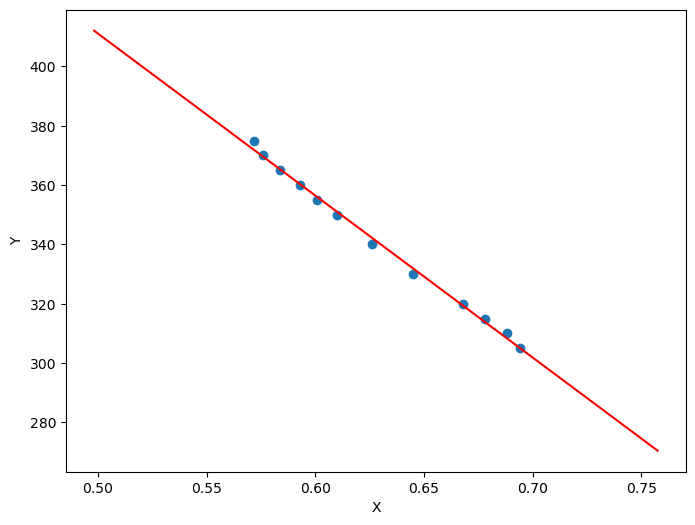

In [17]:
beta = linear_regression(TV["Voltage"], TV["Temperature"])

In [18]:
beta

(array([ 684.14175982, -546.07844961]),
 {'r': -0.9980848190044521,
  'SY': 24.691275603117205,
  'SYX': 1.6019602718175114})

## V vs Vs

In [19]:
def get_cd(row):
    V1 = row["V1"]
    V2 = row["V2"]
    return 0.41*np.sqrt(V2**2-V1**2)

In [21]:
VF["Cd"] = VF.apply(get_cd, axis=1)

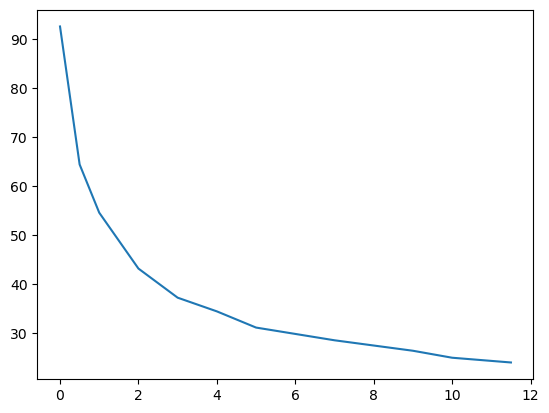

In [24]:
plt.plot(-VF["Voltage"], VF["Cd"]);